# Masterarbeit (Batch-Tool)

In [1]:
# Tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

#Use notebook for interactive plots
#%matplotlib notebook
%matplotlib inline

In [2]:
# JSON Lib
! pip install demjson
import demjson

     |████████████████████████████████| 131 kB 2.6 MB/s eta 0:00:01
  Created wheel for demjson: filename=demjson-2.2.4-py3-none-any.whl size=73544 sha256=19d839b4cbbdad74fa4f7f7a4afbbc399b7e24d07d0c94e1a3c2129cfee75c1b
  Stored in directory: /home/jovyan/.cache/pip/wheels/9c/c3/a5/ad09d152d6b4b24c3f3b6fe2793092ac03e2521e08240d28cf
Successfully built demjson


In [3]:
# Natural Language Toolkit
! pip install nltk
import nltk
nltk.download("stopwords")

     |████████████████████████████████| 1.4 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 738 kB 41.6 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434674 sha256=83447865fa5135ca35ea9aad98ea3715c6e592aa76a16e4e4a8db39d77d04627
  Stored in directory: /home/jovyan/.cache/pip/wheels/ff/d5/7b/f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# WordCloud
! pip install wordcloud
from wordcloud import WordCloud

     |████████████████████████████████| 371 kB 2.2 MB/s eta 0:00:01


In [5]:
# Show all columns
pd.set_option('display.max_columns', None)

In [6]:
# Dateien ausgeben und Variablen setzen
dir_var = "../"
! ls -al ../

total 32
drwxr-xr-x 10 jovyan users   320 Dec 11 14:25 .
drwsrwsr-x  1 jovyan users  4096 Dec 12 18:02 ..
drwxr-xr-x 33 jovyan users  1056 Dec 11 14:25 DS-08-10-2020
drwxr-xr-x 18 jovyan users   576 Dec 11 14:25 DS-22-10-2020
drwxr-xr-x 14 jovyan users   448 Dec 12 18:02 .git
-rw-r--r--  1 jovyan users    43 Dec 11 14:25 .gitattributes
-rw-r--r--  1 jovyan users    30 Dec 11 14:25 .gitignore
-rw-r--r--  1 jovyan users 11357 Dec 11 14:25 LICENSE
drwxr-xr-x  5 jovyan users   160 Dec 12 17:53 notebooks
-rw-r--r--  1 jovyan users   102 Dec 11 14:25 README.md


## Process jobs

In [7]:
dfInputFiles = pd.read_excel(dir_var + "notebooks/inputFiles.xlsx", header=None, names=["inputName", "inputPath", "inputType", "inputId"])

### !!!!!!!!!!!!!!!! Quick Filter !!!!!!!!!!!!!!!!!!!!

In [8]:
# Take only samples
#dfInputFiles = dfInputFiles.tail(45)
#dfInputFiles = dfInputFiles.head(5)
#dfInputFiles = dfInputFiles[dfInputFiles.inputName.str.contains("FREIHEIT")]

### Overview jobs

In [9]:
dfInputFiles

inputName  \
0                                      FREIHEITS-CHAT   
1                            Oliver Janich öffentlich   
2                    ATTILA HILDMANN OFFICIAL ⚫️⚪️🔴⚔️   
3                     Gerechtigkeit für das Vaterland   
4                          Corona Virus Informationen   
5                                             Liberté   
6                              ॐ Golden Age Network ॐ   
7                                💙 Weltfrieden 2020 💙   
8                                  🌍 Verschwörungen 🌍   
9                           [Q] Digital Research Army   
10                                        StefanRaven   
11                               Eva Herman Offiziell   
12                        Xavier Naidoo (inoffiziell)   
13                                 Digitaler Chronist   
14                                Das Prinz Telegramm   
15                  💖🙏💖Strahlenkranz V....Merci Danke   
16  Wissensbewahrung Absicherung/Videokanal, Kultu...   
17     Holistische Gesundheit, Heilung und Aufklärung   
18                                Metropol Chronicles   
19                                       Kulturstudio   
20  Medizinjournalist Rainer Taufertshöfer (öffent...   
21                   Die Deutsche Lösung - Aufklärung   
22                       Die deutsche Lösung - Gruppe   
23                                     n8waechter.net   
24                           🇩🇪 Deutsche Patrioten 🇩🇪   
25                            Patrioten im Widerstand   
26                              FREIHEITSCHAT - BLITZ   
27                                 Antiilluminaten TV   
28                       DieWahrheitundnurdieWahrheit   
29                                     ExpressZeitung   
30                                       🚨Unzensiert🚨   
31                                          Aufwachen   
32                                    Gesundheitsecke   
33                                Wissen ist Weisheit   
34                                  QAnons Channel 🇩🇪   
35                                   Qanon Austria 🇦🇹   
36              Freie Berichterstattung International   
37  Regellese und Diskussionsgruppe zum Xavier's M...   
38                                WIR sind VIEL mehr!   
39  FreiDenker oder doch eher Freiraus Poster - 08...   
40                                Freiheitdergedanken   
41  Querdenken (711 - STUTTGART) - Wir für das Gru...   
42     Holistische Gesundheit, Heilung und Aufklärung   
43                            Fakten Frieden Freiheit   
44  BabylonDecoded Wissen und Erbe für die Nachwel...   
45  Die Zuversicht, Kulturgut, Wissensbewahrung, A...   
46           Holistisches Matrixdenken (übergeordnet)   

                                            inputPath           inputType  \
0   DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat   public_supergroup   
1          DS-08-10-2020/ChatExport_2020-09-25-janich      public_channel   
2        DS-08-10-2020/ChatExport_2020-09-25-hildmann      public_channel   
3   DS-08-10-2020/ChatExport_2020-09-26-gerechtigk...      public_channel   
4      DS-08-10-2020/ChatExport_2020-09-26-cvirusinfo      public_channel   
5         DS-08-10-2020/ChatExport_2020-09-26-liberte      public_channel   
6       DS-08-10-2020/ChatExport_2020-09-26-goldenage      public_channel   
7   DS-08-10-2020/ChatExport_2020-09-26-weltfriede...      public_channel   
8   DS-08-10-2020/ChatExport_2020-09-26-verschwoer...      public_channel   
9   DS-08-10-2020/ChatExport_2020-09-27-digitalRes...      public_channel   
10    DS-08-10-2020/ChatExport_2020-09-27-stefanraven      public_channel   
11      DS-08-10-2020/ChatExport_2020-09-27-evaherman      public_channel   
12         DS-08-10-2020/ChatExport_2020-09-25-xavier      public_channel   
13  DS-08-10-2020/ChatExport_2020-09-29-digitalerC...      public_channel   
14  DS-08-10-2020/ChatExport_2020-09-29-prinzTelegram      public_channel   
15  DS-08-10-2020/ChatExport_2020-09-29-strahlenkranz      public_channel  

### Transform jobs

In [10]:
def convertToDataFrameMeta(filePath):
    dF = pd.read_json(dir_var + filePath + "/result.json", encoding='utf-8')
    return dF

In [11]:
def convertToDataFrameMessages(filePath, dictMeta):
    dF = pd.json_normalize(dictMeta[filePath].messages)
    return dF

In [12]:
def checkIsFormattedText(text):
    textString = str(text)
    if(textString.startswith("[") == True and textString.endswith("]") == True):
        return True
    else:
        return False

In [13]:
def convertToValidText(processedIsFormattedText, text):
    
    if(processedIsFormattedText != True):
        #Is no JSON
        return text;
    else:
        #Is json try to parse
        try:
            jsonList = demjson.decode(str(text), encoding='utf8')

            returnList = []

            # Do for each item in list
            for lItem in jsonList:

                messageString = str(lItem)

                isFormatted = messageString.startswith("{") and messageString.endswith("}")

                if(isFormatted):
                    # Is Json Sub String
                    subJsonString = demjson.decode(str(messageString), encoding='utf8')
                    subJsonType = subJsonString["type"]

                    if(subJsonType == "bold"):
                        #text included
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "italic"):
                        #text included
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "underline"):
                        #text included
                        returnList.append(subJsonString["text"])
                    
                    elif(subJsonType == "email"):
                        #text included (dont return)
                        returnList = returnList
                        
                    elif(subJsonType == "text_link"):
                        #text and href included (only return text)
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "link"):
                        #text included (dont return)
                        returnList = returnList
                        
                    elif(subJsonType == "hashtag"):
                        #text included
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "mention"):
                        #text included
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "mention_name"):
                        #text and user_id included (only return text)
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "bot_command"):
                        #text included (dont return)
                        returnList = returnList 
                        
                    elif(subJsonType == "code"):
                        #text included (dont return)
                        returnList = returnList
                        
                    elif(subJsonType == "phone"):
                        #text included (dont return)
                        returnList = returnList
                        
                    elif(subJsonType == "strikethrough"):
                        #text included
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "pre"):
                        #text and language included
                        returnList.append(subJsonString["text"])
                        
                    elif(subJsonType == "bank_card"):
                        #text included (dont return)
                        returnList = returnList
                        
                    else:
                        print("- Error: Unknown type " + subJsonType)
                        returnList = returnList

                else:
                    # Is Normal Sub String
                    returnList.append(messageString)

            return ''.join(returnList)
        
        except:
            #Parser error
            print("- Warn: Json parser error (set return text to inputText) >>" + text + "<<")
            return text

In [14]:
# Timer Start
timeStartGlobal = time.time()

# Add Key = filePath / Value = DataFrame (Metadata)
dictMeta = {}
for fP in dfInputFiles.inputPath:
    
    dictMeta[fP] = convertToDataFrameMeta(fP)

# Add Key = filePath / Value = DataFrame (Messages)
dictMessages = {}
for fP in dfInputFiles.inputPath:

    timeStartSingle = time.time()
    print("[Process now " + fP + "]")
    dfMessages = convertToDataFrameMessages(fP, dictMeta)
    
    dfMessages["processedChannelFilePath"]  = fP
    dfMessages["processedChannelType"]      = dictMeta[fP].type.iloc[0]
    dfMessages["processedRawTextSize"]      = dfMessages["text"].str.len()
    dfMessages["processedIsFormattedText"]  = dfMessages["text"].apply(checkIsFormattedText)
    dfMessages["processedValidText"]        = dfMessages.apply(lambda x: convertToValidText(x.processedIsFormattedText, x.text), axis=1)
    dfMessages["processedValidTextSize"]    = dfMessages["processedValidText"].str.len()
    
    dictMessages[fP] = dfMessages
    timeEndSingle = time.time()
    print('{:5.3f}s'.format(timeEndSingle-timeStartSingle))

# All Messages to DataFrame
dfAllDataMessages = pd.DataFrame()
for fP in dfInputFiles.inputPath:
    
    print("[Append now " + fP + "]")
    dfMessages        = dictMessages[fP].copy()
    dfAllDataMessages = dfAllDataMessages.append(dfMessages)

# Print Time
timeEndGlobal = time.time()
print()
print("[Finished global]")
print('{:5.3f}s'.format(timeEndGlobal-timeStartGlobal))

[Process now DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat]
- Warn: Json parser error (set return text to inputText) >>[Nachweis hier einfügen]<<
201.091s
[Process now DS-08-10-2020/ChatExport_2020-09-25-janich]
62.646s
[Process now DS-08-10-2020/ChatExport_2020-09-25-hildmann]
20.853s
[Process now DS-08-10-2020/ChatExport_2020-09-26-gerechtigkeitVaterland]
1.030s
[Process now DS-08-10-2020/ChatExport_2020-09-26-cvirusinfo]
9.371s
[Process now DS-08-10-2020/ChatExport_2020-09-26-liberte]
3.480s
[Process now DS-08-10-2020/ChatExport_2020-09-26-goldenage]
4.371s
[Process now DS-08-10-2020/ChatExport_2020-09-26-weltfrieden2020]
3.443s
[Process now DS-08-10-2020/ChatExport_2020-09-26-verschwoerungen]
8.913s
[Process now DS-08-10-2020/ChatExport_2020-09-27-digitalResearch]
- Error: Unknown type cashtag
32.700s
[Process now DS-08-10-2020/ChatExport_2020-09-27-stefanraven]
1.767s
[Process now DS-08-10-2020/ChatExport_2020-09-27-evaherman]
39.725s
[Process now DS-08-10-2020/ChatExport_2020

### Type of channels

In [15]:
dfInputFiles.inputType.value_counts()

public_channel        38
public_supergroup      8
private_supergroup     1
Name: inputType, dtype: int64

### Only in different types of channels

In [16]:
dfAllDataMessages.columns.difference(
    dfAllDataMessages[dfAllDataMessages.processedChannelType == "public_channel"].dropna(how='all', axis=1).columns
)

Index(['address', 'contact_information.first_name',
       'contact_information.last_name', 'contact_information.phone_number',
       'contact_vcard', 'game_description', 'game_link', 'game_message_id',
       'game_title', 'inviter', 'members', 'place_name', 'saved_from',
       'score'],
      dtype='object')

In [17]:
dfAllDataMessages.columns.difference(
    dfAllDataMessages[dfAllDataMessages.processedChannelType == "public_supergroup"].dropna(how='all', axis=1).columns
)

Index(['author', 'live_location_period_seconds'], dtype='object')

In [18]:
# Vorsicht: Wenige Daten
dfAllDataMessages.columns.difference(
    dfAllDataMessages[dfAllDataMessages.processedChannelType == "private_supergroup"].dropna(how='all', axis=1).columns
)

Index(['address', 'author', 'contact_information.first_name',
       'contact_information.last_name', 'contact_information.phone_number',
       'contact_vcard', 'game_description', 'game_link', 'game_message_id',
       'game_title', 'inviter', 'live_location_period_seconds',
       'location_information.latitude', 'location_information.longitude',
       'place_name', 'score'],
      dtype='object')

## Queries

In [19]:
def queryChannelId(filePath):
    dfMeta = dictMeta[filePath].copy()
    return str(dfMeta["id"].iloc[0])

In [20]:
def queryChannelName(filePath):
    dfMeta = dictMeta[filePath].copy()
    inputStr  = str(dfMeta["name"].iloc[0])
    outputStr = inputStr.encode('ascii', 'ignore')
    outputStr = outputStr.decode('ascii')
    return outputStr[:25]

In [21]:
def queryChannelType(filePath):
    dfMeta = dictMeta[filePath].copy()
    return str(dfMeta["type"].iloc[0])

In [22]:
def queryChannelCountEntries(filePath):
    dfMessages = dictMessages[filePath].copy()
    return len(dfMessages.index)

In [23]:
def queryChannelCountRawText(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.processedRawTextSize > 0]
    return len(dfMessages.index)

In [24]:
def queryChannelCountIsFormattedText(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.processedIsFormattedText == True]
    return len(dfMessages.index)

In [25]:
def queryChannelCountValidText(filePath):
    dfMessages = dictMessages[filePath].copy()
    dfMessages = dfMessages[dfMessages.processedValidTextSize > 0]
    return len(dfMessages.index)

In [26]:
# TODO mit process
def queryChannelCountPhoto(filePath):
    dfMessages = dictMessages[filePath].copy()
    if "photo" not in dfMessages.columns:
        return 0
    else:
        dfMessages = dfMessages.photo.dropna()
        return len(dfMessages.index)

In [27]:
# TODO mit process
def queryChannelCountFile(filePath):
    dfMessages = dictMessages[filePath].copy()
    if "file" not in dfMessages.columns:
        return 0
    else:
        dfMessages = dfMessages.file.dropna()
        return len(dfMessages.index)

In [28]:
# TODO mit process
def queryChannelCountEdited(filePath):
    dfMessages = dictMessages[filePath].copy()
    if "edited" not in dfMessages.columns:
        return 0
    else:
        dfMessages = dfMessages.edited.dropna()
        return len(dfMessages.index)

In [29]:
def queryCalcPercent(countFiltered, countTotal):
    return (countFiltered / countTotal) * 100

In [30]:
dfQueryMeta = pd.DataFrame(dfInputFiles.inputPath)

dfQueryMeta["queryChannelId"]                     = dfQueryMeta.inputPath.apply(queryChannelId)
dfQueryMeta["queryChannelName"]                   = dfQueryMeta.inputPath.apply(queryChannelName)
dfQueryMeta["queryChannelType"]                   = dfQueryMeta.inputPath.apply(queryChannelType)
dfQueryMeta["queryChannelCountEntries"]           = dfQueryMeta.inputPath.apply(queryChannelCountEntries)

dfQueryMeta["queryChannelCountRawText"]           = dfQueryMeta.inputPath.apply(queryChannelCountRawText)
dfQueryMeta["queryChannelCountIsFormattedText"]   = dfQueryMeta.inputPath.apply(queryChannelCountIsFormattedText)
dfQueryMeta["queryChannelCountValidText"]         = dfQueryMeta.inputPath.apply(queryChannelCountValidText)
dfQueryMeta["queryChannelCountPhoto"]             = dfQueryMeta.inputPath.apply(queryChannelCountPhoto)
dfQueryMeta["queryChannelCountFile"]              = dfQueryMeta.inputPath.apply(queryChannelCountFile)
dfQueryMeta["queryChannelCountEdited"]            = dfQueryMeta.inputPath.apply(queryChannelCountEdited)

dfQueryMeta["queryChannelPercentRawText"]         = queryCalcPercent(dfQueryMeta["queryChannelCountRawText"], dfQueryMeta["queryChannelCountEntries"])
dfQueryMeta["queryChannelPercentIsFormattedText"] = queryCalcPercent(dfQueryMeta["queryChannelCountIsFormattedText"], dfQueryMeta["queryChannelCountEntries"])
dfQueryMeta["queryChannelPercentValidText"]       = queryCalcPercent(dfQueryMeta["queryChannelCountValidText"], dfQueryMeta["queryChannelCountEntries"])
dfQueryMeta["queryChannelPercentPhoto"]           = queryCalcPercent(dfQueryMeta["queryChannelCountPhoto"], dfQueryMeta["queryChannelCountEntries"])
dfQueryMeta["queryChannelPercentFile"]            = queryCalcPercent(dfQueryMeta["queryChannelCountFile"], dfQueryMeta["queryChannelCountEntries"])
dfQueryMeta["queryChannelPercentEdited"]          = queryCalcPercent(dfQueryMeta["queryChannelCountEdited"], dfQueryMeta["queryChannelCountEntries"])

dfQueryMeta.sort_values(by="queryChannelCountEntries", ascending=False)

inputPath queryChannelId  \
0   DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat     9717909816   
28  DS-08-10-2020/ChatExport_2020-10-02-chatDieWah...     9969119455   
38    DS-22-10-2020/ChatExport_2020-10-13-wirSindMehr     9788772075   
1          DS-08-10-2020/ChatExport_2020-09-25-janich     9808932799   
26  DS-08-10-2020/ChatExport_2020-10-01-freiheitsC...     9943834900   
30     DS-08-10-2020/ChatExport_2020-10-04-unzensiert     9725746662   
11      DS-08-10-2020/ChatExport_2020-09-27-evaherman     9915108907   
15  DS-08-10-2020/ChatExport_2020-09-29-strahlenkranz    10050449614   
37     DS-22-10-2020/ChatExport_2020-10-13-xavierChat     9907103286   
2        DS-08-10-2020/ChatExport_2020-09-25-hildmann    10034163583   
22    DS-08-10-2020/ChatExport_2020-09-30-deutscheLsg     9982253319   
39     DS-22-10-2020/ChatExport_2020-10-15-freiDenker     9836526551   
27  DS-08-10-2020/ChatExport_2020-10-02-antiillumi...    10060003597   
33  DS-22-10-2020/ChatExport_2020-10-12-wissenWeis...     9691754437   
9   DS-08-10-2020/ChatExport_2020-09-27-digitalRes...     9846664545   
19   DS-08-10-2020/ChatExport_2020-09-30-kulturstudio    10064728094   
12         DS-08-10-2020/ChatExport_2020-09-25-xavier     9874390332   
34  DS-22-10-2020/ChatExport_2020-10-12-qAnonsGermany     9804534747   
29  DS-08-10-2020/ChatExport_2020-10-03-expressZei...     9857073102   
35   DS-22-10-2020/ChatExport_2020-10-13-qanonAustria     9962163863   
8   DS-08-10-2020/ChatExport_2020-09-26-verschwoer...     9942502804   
31      DS-22-10-2020/ChatExport_2020-10-11-aufwachen     9683270591   
7   DS-08-10-2020/ChatExport_2020-09-26-weltfriede...     9850980068   
43  DS-22-10-2020/ChatExport_2020-10-20-faktenFrie...     9785934992   
41  DS-22-10-2020/ChatExport_2020-10-18-querdenken711     9812812343   
13  DS-08-10-2020/ChatExport_2020-09-29-digitalerC...    10068312319   
5         DS-08-10-2020/ChatExport_2020-09-26-liberte    10068807626   
32  DS-22-10-2020/ChatExport_2020-10-11-gesundheit...     9706227251   
25  DS-08-10-2020/ChatExport_2020-10-01-patriotenW...     9913028741   
4      DS-08-10-2020/ChatExport_2020-09-26-cvirusinfo     9917074801   
24  DS-08-10-2020/ChatExport_2020-10-01-deutschePatri     9785040372   
20  DS-08-10-2020/ChatExport_2020-09-30-rainerMedizin     9804874080   
6       DS-08-10-2020/ChatExport_2020-09-26-goldenage     9862302472   
40  DS-22-10-2020/ChatExport_2020-10-18-freiheitDe...    10013009712   
10    DS-08-10-2020/ChatExport_2020-09-27-stefanraven     9820850677   
14  DS-08-10-2020/ChatExport_2020-09-29-prinzTelegram     9742969264   
42  DS-22-10-2020/ChatExport_2020-10-18-holistisch...     9758769198   
17  DS-08-10-2020/ChatExport_2020-09-30-holistisch...     9758769198   
3   DS-08-10-2020/ChatExport_2020-09-26-gerechtigk...    10069007089   
16  DS-08-10-2020/ChatExport_2020-09-30-absicherun...     9779767132   
36  DS-22-10-2020/ChatExport_2020-10-13-freieBeric...     9935429847   
21  DS-08-10-2020/ChatExport_2020-09-30-deutscheAu...     9927244279   
46  DS-22-10-2020/ChatExport_2020-10-21-holistisch...     9894423174   
23  DS-08-10-2020/ChatExport_2020-10-01-nachtwaechter     9744633492   
18  DS-08-10-2020/ChatExport_2020-09-30-metropolChron     9919682714   
45  DS-22-10-2020/ChatExport_2020-10-21-zuversicht...     9770976019   
44  DS-22-10-2020/ChatExport_2020-10-21-babylonDec...    10002534295   

             queryChannelName    queryChannelType  queryChannelCountEntries  \
0              FREIHEITS-CHAT   public_supergroup                    271554   
28  DieWahrheitundnurdieWahrh   public_supergroup                    113825   
38        WIR sind VIEL mehr!   public_supergroup                     79384   
1     Oliver Janich ffentlich      public_channel                     35040   
26      FREIHEITSCHAT - BLITZ   public_supergroup                     31392   
30                 Unzensiert      public_channel                     30814   
11       Eva Herman Offiziell     

### Plotter

In [31]:
def queryPlotter(attributeName):
    dfFilter = dfQueryMeta.copy()
    sns.catplot(
        y="queryChannelName",
        x=attributeName,
        data=dfFilter,
        hue="queryChannelType",
        #aspect=1.2,
        #palette="rocket",
        kind="bar",
        height=7,
        order=dfFilter.sort_values(attributeName, ascending=False).queryChannelName
    )

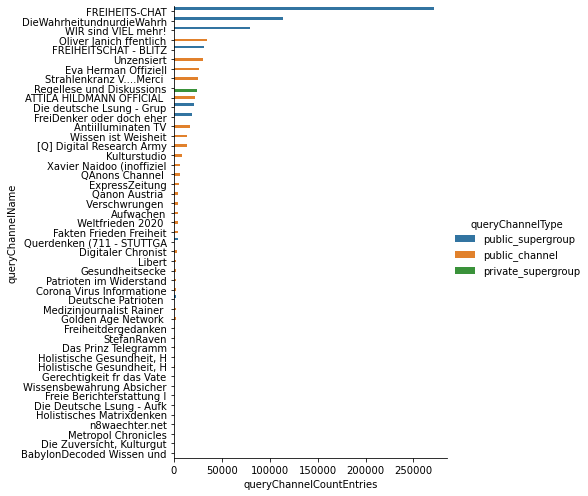

In [32]:
queryPlotter("queryChannelCountEntries")

In [33]:
#queryPlotter("queryChannelPercentRawText")

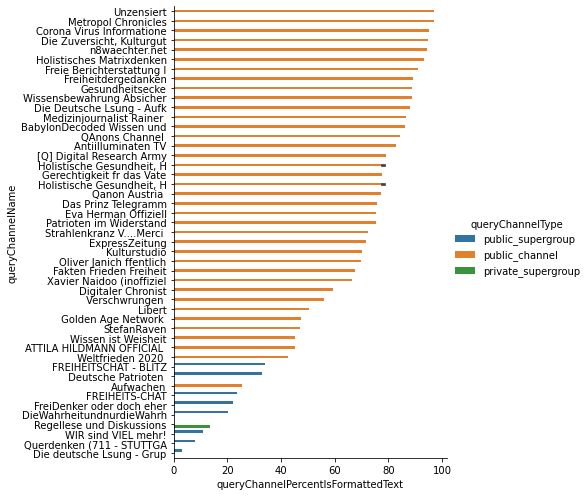

In [34]:
queryPlotter("queryChannelPercentIsFormattedText")

In [35]:
#queryPlotter("queryChannelPercentValidText") 

In [36]:
#queryPlotter("queryChannelPercentPhoto")

In [37]:
#queryPlotter("queryChannelPercentFile")

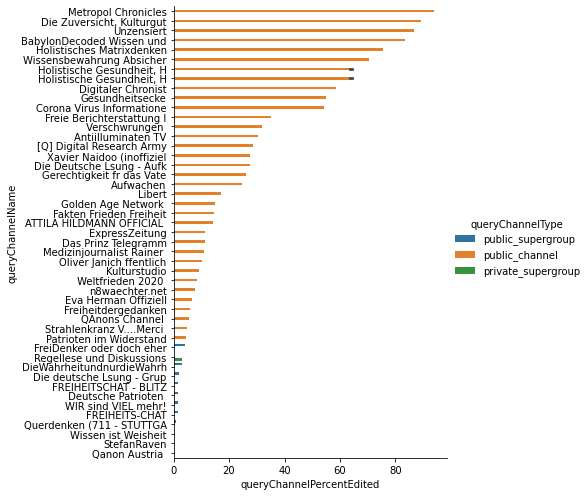

In [38]:
queryPlotter("queryChannelPercentEdited")

## Get valid text

In [39]:
def normalizedValidTextSize(df):
    df = df.copy()
    # https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
    # keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
    return df[np.abs(df.processedValidTextSize-df.processedValidTextSize.mean()) <= (3*df.processedValidTextSize.std())]

Before all filters		831260
Before normalizedValidTextSize	524609
After normalizedValidTextSize	514091


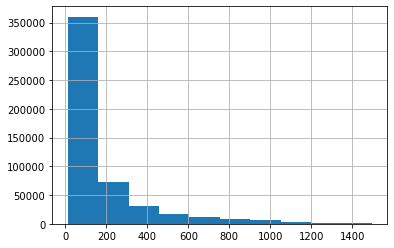

In [40]:
dfMessages = dfAllDataMessages.copy()
print("Before all filters\t\t" + str(len(dfMessages.index)))

dfMessages = dfMessages[dfMessages.processedValidTextSize > 10]
print("Before normalizedValidTextSize\t" + str(len(dfMessages.index)))

dfMessages = normalizedValidTextSize(dfMessages)
print("After normalizedValidTextSize\t" + str(len(dfMessages.index)))

_ = dfMessages.processedValidTextSize.hist()

## Word Clouds

In [41]:
#TODO Difference capital letters?
#TODO Context?

# Use "global" for all DataFrames
def plotChannelWordCloud(filePath, label, filterList):
    timeStart = time.time()
    
    if(filePath != "global"):
        dfMessages = dictMessages[filePath].copy()
    else:
        dfMessages = dfAllDataMessages.copy()
    
    print("[Start transform text to global text string]")
    textList = []
    for index, row in dfMessages.iterrows():
        textList.append(" " + row["processedValidText"])
        
    textString = ''.join(textList)
    
    germanStopWordsList = nltk.corpus.stopwords.words('german')
    germanStopWordsList.append("http")
    germanStopWordsList.append("https")
    germanStopWordsList.append("ja") #TODO: split to local - maybe?
    germanStopWordsList.append("mehr")
    germanStopWordsList.append("mal")
    germanStopWordsList.append("schon")
    germanStopWordsList.append("immer")
    germanStopWordsList.append("wurde")
    germanStopWordsList.append("wurden")
    germanStopWordsList.append("sei")
    germanStopWordsList.append("sein")
    germanStopWordsList.append("viel")
    germanStopWordsList.append("viele")
    germanStopWordsList.append("wegen")
    germanStopWordsList.append("müssen")
    germanStopWordsList.append("geht")
    germanStopWordsList.append("gibt")
    germanStopWordsList.append("wer")
    germanStopWordsList.append("wie")
    germanStopWordsList.append("was")
    germanStopWordsList.append("machen")
    germanStopWordsList.append("machte")
    germanStopWordsList.append("kommen")
    germanStopWordsList.append("tun")
    
    for fItem in filterList:
        germanStopWordsList.append(fItem)
    
    print("[Start generate wordCloud]")
    wordcloud = WordCloud(
                background_color="black",
                width=1920,
                height=1080,
                stopwords=germanStopWordsList
            ).generate(textString)
    wordcloud.to_file("wordcloud-" + label + ".png")
    
    print("Top 20 occ:\n" + str(pd.Series(wordcloud.words_).head(20)))
    
    print("[Start generate figure]")
    plt.figure(figsize=(14, 14))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()
    
    timeEnd = time.time()
    print("[Finished]")
    print('{:5.3f}s'.format(timeEnd-timeStart))

### Public channels

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Deutschland    1.000000
Menschen       0.777668
Video          0.757905
sagte          0.731225
Polizei        0.595356
bereit         0.525692
Berlin         0.461462
Corona         0.420455
Prozent        0.414032
neue           0.398715
AfD            0.389822
laut           0.382905
dabei          0.381423
sollen         0.373518
Fall           0.371047
Welt           0.368577
and            0.368577
sagt           0.367589
Kinder         0.364625
a              0.362154
dtype: float64
[Start generate figure]


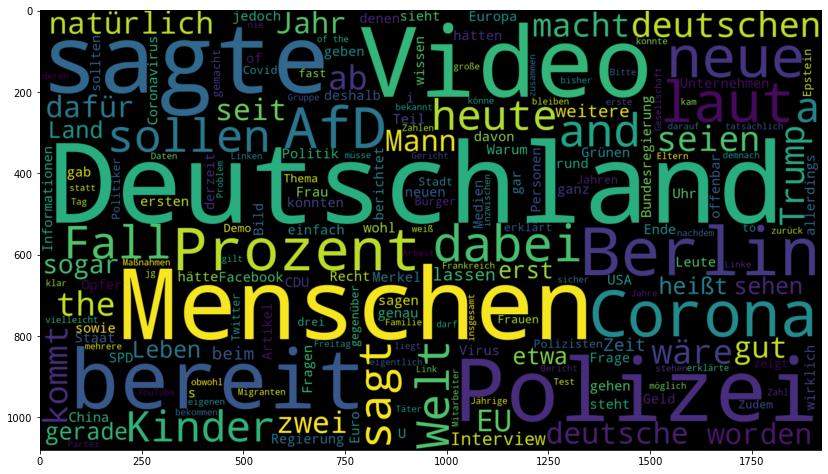

[Finished]
11.681s


In [42]:
# Oliver Janich öffentlich (public_channel)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-25-janich",
    "pc-janich",
    []
)

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Deutschland                  1.000000
Corona                       0.751402
Gate                         0.600935
Merkel                       0.593458
Menschen                     0.576636
WOLF ATTILAHILDMANN          0.486916
China                        0.484112
ATTILAHILDMANN CHAT          0.457009
CHAT BEITRETEN               0.453271
BEITRETEN ChatDerFreiheit    0.449533
heute                        0.426168
FOLG                         0.390654
Video                        0.373832
deutschen                    0.363551
einfach                      0.362617
macht                        0.357944
Freiheit                     0.357944
kommt                        0.353271
NWO                          0.341121
Welt                         0.302804
dtype: float64
[Start generate figure]


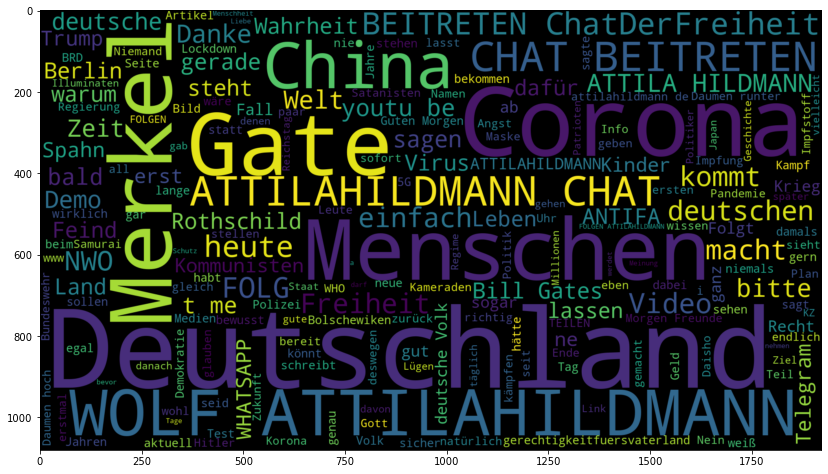

[Finished]
8.048s


In [43]:
# ATTILA HILDMANN OFFICIAL (public_channel)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-25-hildmann",
    "pc-hildmann",
    ["ATTILAHILDMANN CHAT"]
)

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Folgt          1.000000
Corona         0.061181
Spahn          0.052743
Menschen       0.044304
Welt           0.040084
Test           0.035865
Video          0.035865
Berlin         0.035865
Juden          0.031646
Merkel         0.029536
Maske          0.029536
R              0.027426
Lockdown       0.027426
PCR            0.025316
Demo           0.025316
TEILEN         0.023207
Millionen      0.023207
Teil           0.023207
Kinder         0.023207
Deutschland    0.021097
dtype: float64
[Start generate figure]


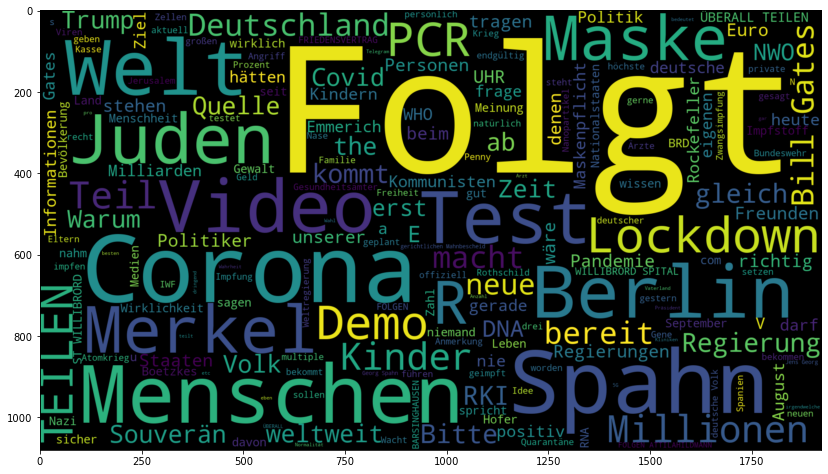

[Finished]
5.571s


In [44]:
# Gerechtigkeit für das Vaterland (public_channel)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-26-gerechtigkeitVaterland",
    "pc-GerechtigkeitfuerdasVaterland",
    ["gerechtigkeitfuersvaterland"]
)

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Informationen    1.000000
Corona           0.271530
Menschen         0.128166
Kinder           0.054711
Berlin           0.054205
Bitte            0.052178
Maskenpflicht    0.045593
macht            0.045086
Coronavirus      0.042553
Folgen           0.042553
Regierung        0.042047
Covid            0.040020
Pandemie         0.038501
Masken           0.038501
5G               0.037994
sollen           0.036981
Test             0.036474
Polizei          0.034954
krank            0.033435
Demo             0.032928
dtype: float64
[Start generate figure]


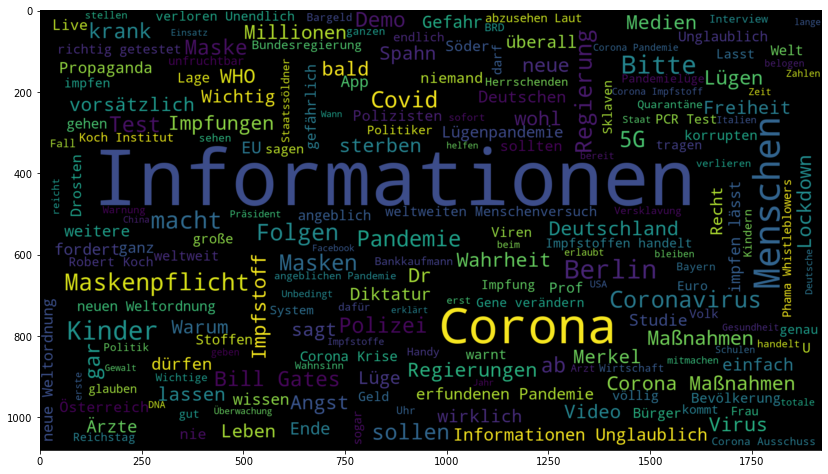

[Finished]
5.137s


In [45]:
# Corona Virus Informationen (public_channel)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-26-cvirusinfo",
    "pc-cVirusInfo",
    [])

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Menschen            1.000000
Corona              0.930769
Berlin              0.815385
Video               0.738462
Bitte               0.653846
LiberteseiMENSCH    0.630769
heute               0.538462
Trump               0.523077
Welt                0.476923
u                   0.476923
Leben               0.469231
Demo                0.461538
Deutschland         0.430769
ab                  0.423077
Kanal               0.392308
neue                0.392308
Warum               0.392308
Kinder              0.384615
Zeit                0.384615
macht               0.369231
dtype: float64
[Start generate figure]


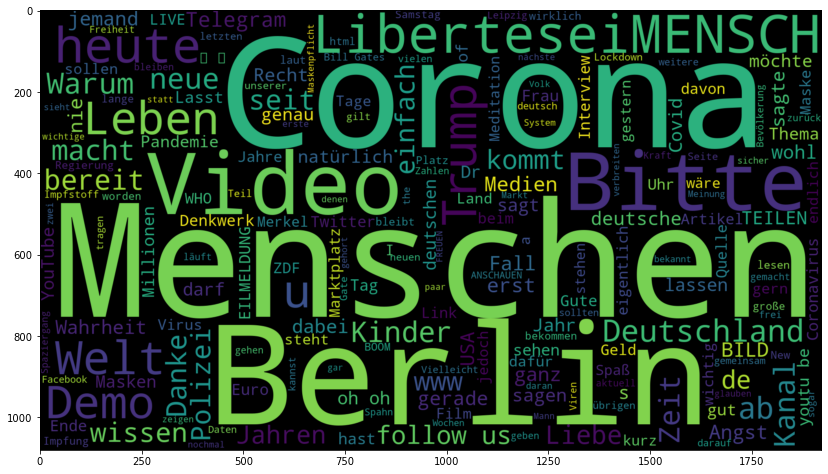

[Finished]
5.795s


In [46]:
# Liberté (public_channel)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-26-liberte",
    "pc-liberte",
    []
)

In [47]:
# TODO LIST

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Menschen       1.000000
Deutschland    0.669903
heute          0.569348
Corona         0.540915
sagte          0.510402
Video          0.447989
Welt           0.424411
bereit         0.389043
Kinder         0.383495
Zeit           0.382108
Coronavirus    0.377947
Liebe Eva      0.371706
China          0.360610
Virus          0.348128
Zuschrift      0.319001
Leben          0.317614
Berlin         0.314840
USA            0.306519
macht          0.300277
Polizei        0.291956
dtype: float64
[Start generate figure]


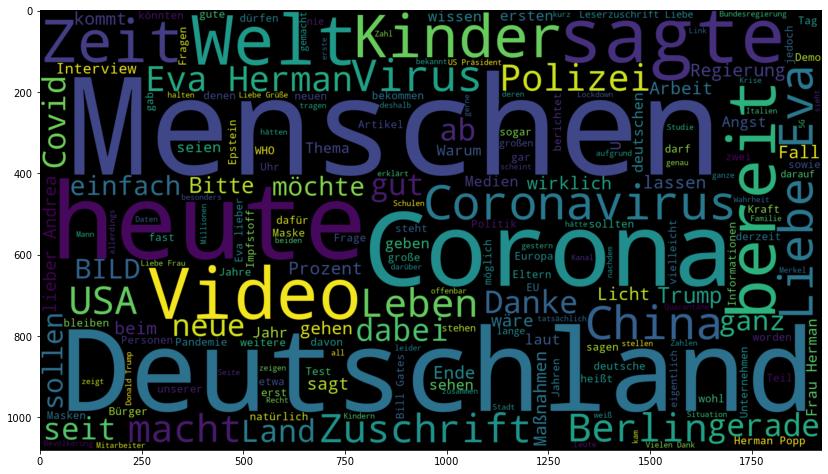

[Finished]
9.348s


In [48]:
# Eva Herman Offiziell (public_channel)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-27-evaherman",
    "pc-evaHerman",
    []
)

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
oneLove        1.000000
Menschen       0.256331
Video          0.153799
Deutschland    0.147622
Corona         0.142063
bitte          0.130945
Kinder         0.126004
Wahrheit       0.114886
Berlin         0.110562
Danke          0.109944
Kanäle         0.109944
Liebe          0.096973
Warum          0.096973
einfach        0.092032
macht          0.090179
heute          0.089561
Zeit           0.088326
Demo           0.088326
bereit         0.084620
Polizei        0.084002
dtype: float64
[Start generate figure]


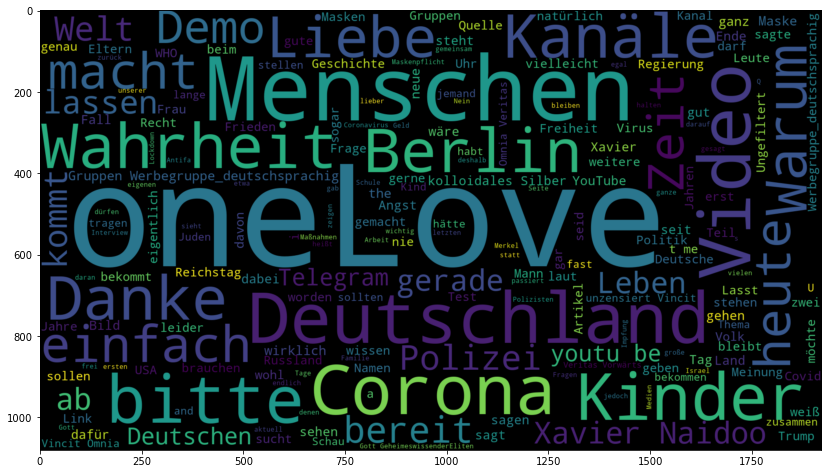

[Finished]
6.024s


In [49]:
# Xavier Naidoo (public_channel)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-25-xavier",
    "pc-xavier",
    ["xavier_naidoo", "Xavier_Naidoo", "politische_bildersprueche", "einmal_hin_alles_drin"]
)

In [50]:
# TODO LIST

### Public supergroups

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Menschen       1.000000
Attila         0.618001
Video          0.512421
einfach        0.506211
Deutschland    0.504436
bitte          0.474665
Leute          0.469637
Berlin         0.451696
macht          0.444203
Warum          0.429022
kommt          0.418277
Demo           0.417882
gut            0.385844
Corona         0.374310
genau          0.359523
heute          0.353904
Kinder         0.345229
Leben          0.342666
hast           0.336061
Danke          0.336061
dtype: float64
[Start generate figure]


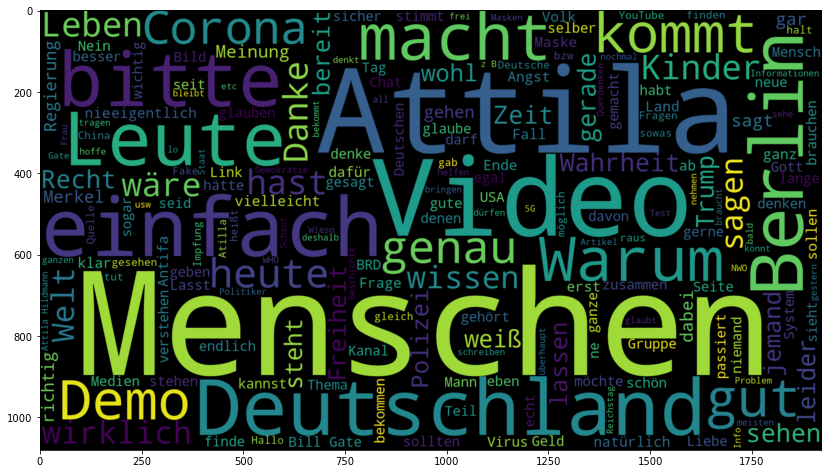

[Finished]
39.997s


In [51]:
# FREIHEITS-CHAT (public_supergroup)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-28-freiheitsChat",
    "ps-freiheitsChat",
    []
)

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Menschen       1.000000
Leben          0.413352
gut            0.410511
wäre           0.382102
Geld           0.360795
Deutschland    0.338778
Zeit           0.335227
bitte          0.333807
erst           0.322443
heute          0.317472
Volk           0.311080
kommt          0.300426
wissen         0.299006
einfach        0.295455
Deutsche       0.292614
genau          0.286222
denke          0.284091
System         0.282670
Thema          0.276278
Frage          0.271307
dtype: float64
[Start generate figure]


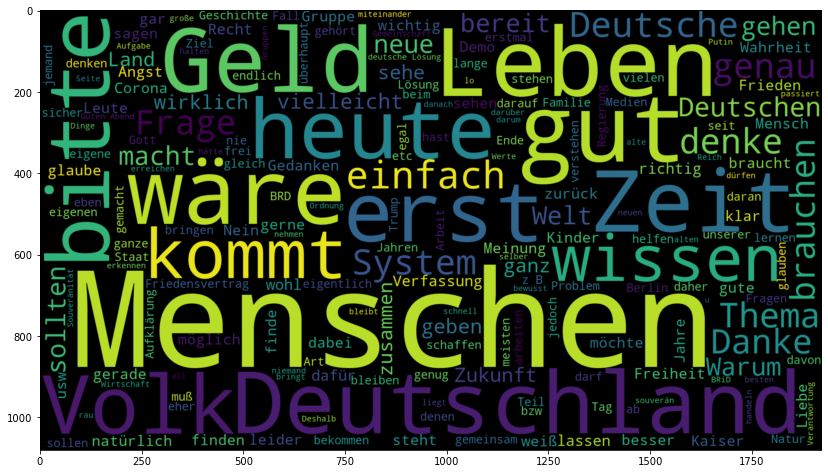

[Finished]
8.204s


In [52]:
# Die deutsche Lösung - Gruppe (public_supergroup)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-09-30-deutscheLsg",
    "ps-DieDeutscheLoseungGruppe",
    []
)

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Befehl                      1.000000
Hallo                       0.811111
Berlin                      0.755556
Regeln                      0.688889
Willkommen                  0.622222
Problem                     0.566667
Deutschland                 0.566667
Spaß                        0.566667
Corona                      0.533333
Admin                       0.533333
Demo                        0.522222
wünschen                    0.522222
beachte                     0.500000
kontaktiere                 0.500000
Deutsche_Patrioten Stell    0.500000
bitte kurz                  0.500000
Regeln rufst                0.500000
Gruppenlink bekommst        0.500000
Admin Schön                 0.500000
LG Deutsche_Patrioten       0.500000
dtype: float64
[Start generate figure]


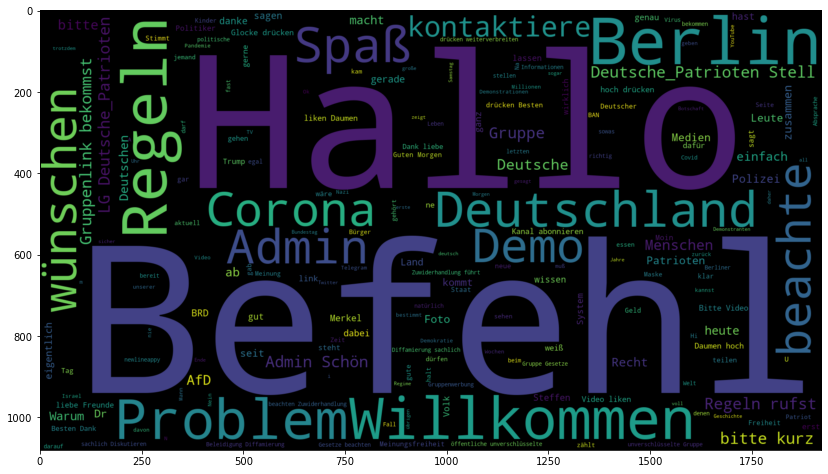

[Finished]
5.500s


In [53]:
# Deutsche Patrioten (public_supergroup)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-10-01-deutschePatri",
    "ps-deutschePatrioten",
    []
)

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Menschen       1.000000
Deutschland    0.609467
Corona         0.494083
bitte          0.489645
Video          0.485207
Berlin         0.464497
macht          0.461538
kommt          0.460059
Kinder         0.458580
gut            0.392012
Warum          0.387574
Leben          0.381657
einfach        0.378698
Maske          0.373521
Demo           0.369822
Welt           0.368343
heute          0.368343
Leute          0.360207
genau          0.342456
Danke          0.329882
dtype: float64
[Start generate figure]


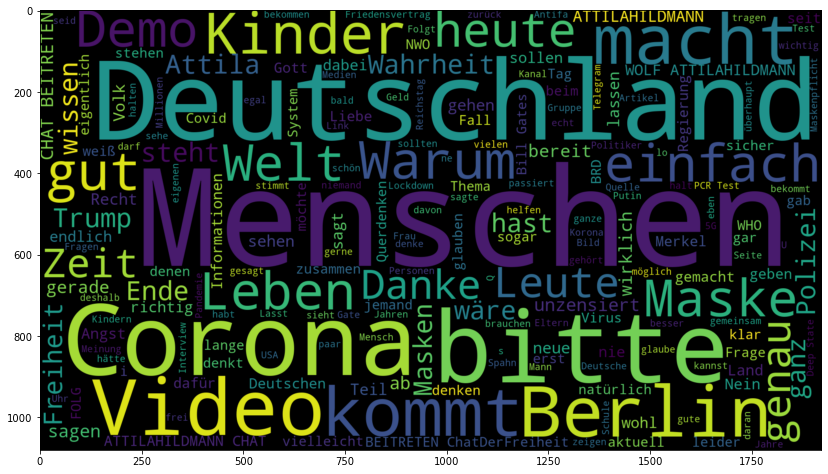

[Finished]
9.613s


In [54]:
# FREIHEITSCHAT - BLITZ (public_supergroup)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-10-01-freiheitsChatBlitz",
    "ps-freiheitsChatBlitz",
    []
)

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Menschen       1.000000
gut            0.887355
Deutschland    0.877285
kommt          0.857516
Video          0.749347
genau          0.693398
macht          0.653115
einfach        0.599403
bitte          0.595300
warum          0.572175
hast           0.569937
wissen         0.556136
heute          0.533756
Trump          0.525923
schön          0.522193
Leute          0.506154
Danke          0.491981
Zeit           0.480791
Wahrheit       0.478180
Leben          0.470347
dtype: float64
[Start generate figure]


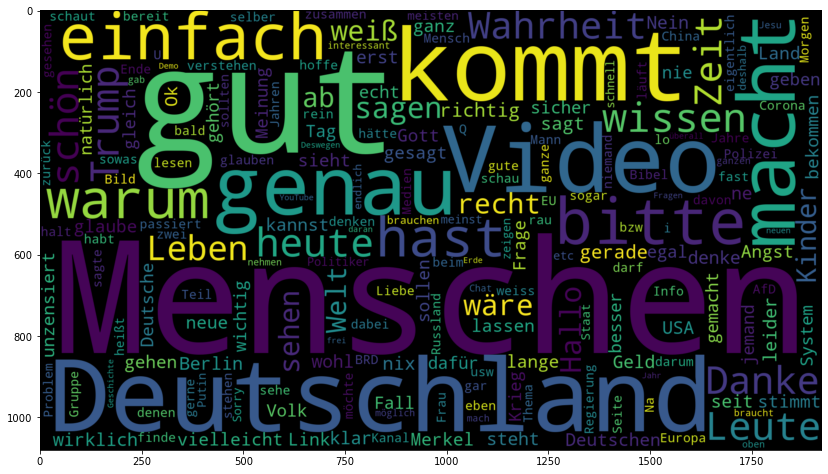

[Finished]
19.069s


In [55]:
# DieWahrheitundnurdieWahrheit (public_supergroup)
plotChannelWordCloud(
    "DS-08-10-2020/ChatExport_2020-10-02-chatDieWahrheit",
    "ps-DieWahrheitundnurdieWahrheit",
    []
)

In [56]:
# TODO LIST

[Start transform text to global text string]
[Start generate wordCloud]
Top 20 occ:
Menschen       1.000000
Deutschland    0.677353
Video          0.559884
einfach        0.497020
heute          0.488727
macht          0.442881
kommt          0.440798
Wahrheit       0.427874
Warum          0.408990
gut            0.400445
Leben          0.391326
Berlin         0.381633
Welt           0.368995
Kinder         0.368349
Leute          0.356933
genau          0.354886
wissen         0.342931
wäre           0.333345
sehen          0.329899
Trump          0.323329
dtype: float64
[Start generate figure]


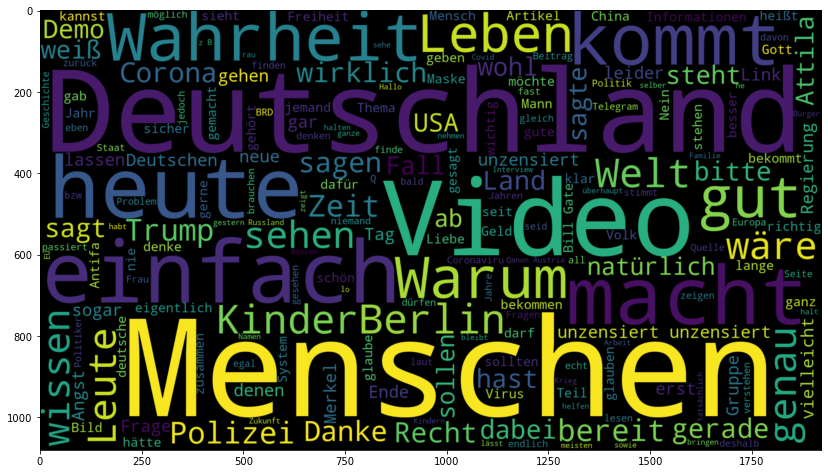

[Finished]
120.048s


In [57]:
plotChannelWordCloud(
    "global",
    "global",
    []
)

## Concordance

In [59]:
#t = nltk.text.Text("Hallo Welt. Was machst du gerade? Das ist nur ein Test! Schöne Welt! Das geht ja gar nicht Welt!")